In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("./DataSets/CTG.xls", sheetname='Raw Data')

In [3]:
df_cartography = data.drop(columns=['FileName', 'SegFile', 'Date', 'b', 'e'])
del(data)

In [4]:
df_cartography.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [5]:
df_cartography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 35 columns):
LBE         2126 non-null float64
LB          2126 non-null float64
AC          2126 non-null float64
FM          2127 non-null float64
UC          2127 non-null float64
ASTV        2127 non-null float64
MSTV        2127 non-null float64
ALTV        2127 non-null float64
MLTV        2127 non-null float64
DL          2128 non-null float64
DS          2128 non-null float64
DP          2128 non-null float64
DR          2128 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Variance    2126 non-null float64
Tendency    2126 non-null float64
A           2126 non-null float64
B           2126 non-null float64
C           2126 non-null float64
D        

In [6]:
df_cartography.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.0,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.0,91.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
DL,2128.0,1.576128,2.517794,0.0,0.0,0.0,3.0,16.0


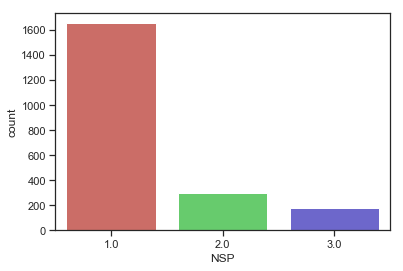

In [7]:
sns.countplot(x = 'NSP', data = df_cartography, palette = 'hls')
plt.show()

In [8]:
df_cartography.dropna(inplace=True)
df_cartography.drop_duplicates(inplace=True)
print()

In [9]:
X = df_cartography.loc[:,(df_cartography.columns != 'NSP')]
y = df_cartography['NSP']

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.3, 
                                                      random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
model = GridSearchCV(estimator=clf, 
                     param_grid={
                     }, 
                     cv=10, 
                     n_jobs=2, 
                     scoring='r2')
model.fit(X_train, y_train)
print()
print(model.best_params_)
print('R² %.2f%%' % (model.best_score_*100))


{}
R² 95.57%


In [11]:
predictions = model.predict(X_valid)
print('R² %.2f%%' % (model.score(X_valid, y_valid)*100))

R² 97.36%


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean square error: %.2f'
      % mean_squared_error(y_valid, predictions))

# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_valid, predictions))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R²): %.2f%%'
      % (r2_score(y_valid, predictions)*100))

Mean square error: 0.01
Mean absolute error: 0.01
Coefficient of determination (R²): 97.36%


In [13]:
class_names=['Normal','Suspect','Pathologic']

In [14]:
def matrix_confusao(y_test, y_pred, labels):
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    %matplotlib inline

    cm = confusion_matrix(y_test, y_pred) 

    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=labels, yticklabels=labels, cmap="coolwarm")
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')

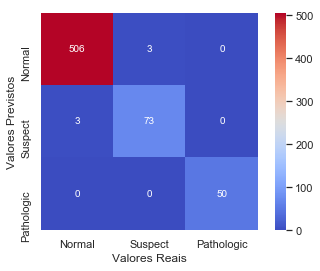

In [15]:
matrix_confusao(y_valid,
                predictions,
                class_names)

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_valid, 
                                    predictions, 
                                    target_names=class_names))

             precision    recall  f1-score   support

     Normal       0.99      0.99      0.99       509
    Suspect       0.96      0.96      0.96        76
 Pathologic       1.00      1.00      1.00        50

avg / total       0.99      0.99      0.99       635



In [17]:
cnf_matrix = metrics.confusion_matrix(y_valid, predictions)

print('Precision', cnf_matrix[0, 0] / sum(cnf_matrix[:, 0]))
print('Recall', cnf_matrix[0, 0] / sum(cnf_matrix[0, :]))
print('Specificity', cnf_matrix[1, 1] / sum(cnf_matrix[1, :]))
print("Accuracy:",metrics.accuracy_score(y_valid, predictions))

Precision 0.9941060903732809
Recall 0.9941060903732809
Specificity 0.9605263157894737
Accuracy: 0.9905511811023622


Text(0.5,257.44,'Predicted label')

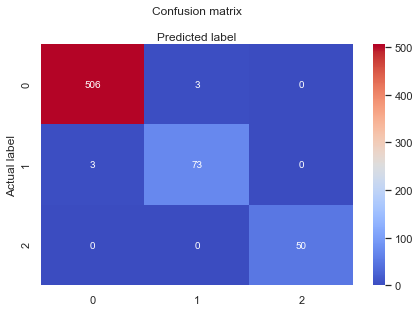

In [18]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

auc = multiclass_roc_auc_score(y_valid, predictions, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9875760260093785


# Redução Para Visualização

In [20]:
from sklearn.decomposition import PCA
pca_cartography = PCA(n_components=2)
principalComponents_cartography = pca_cartography.fit_transform(X_valid)

In [21]:
principal_cartography_Df = pd.DataFrame(data = principalComponents_cartography, 
                                        columns = ['principal component 1', 
                                                   'principal component 2'])
principal_cartography_Df['y']        = y_valid
principal_cartography_Df['predicts'] = predictions

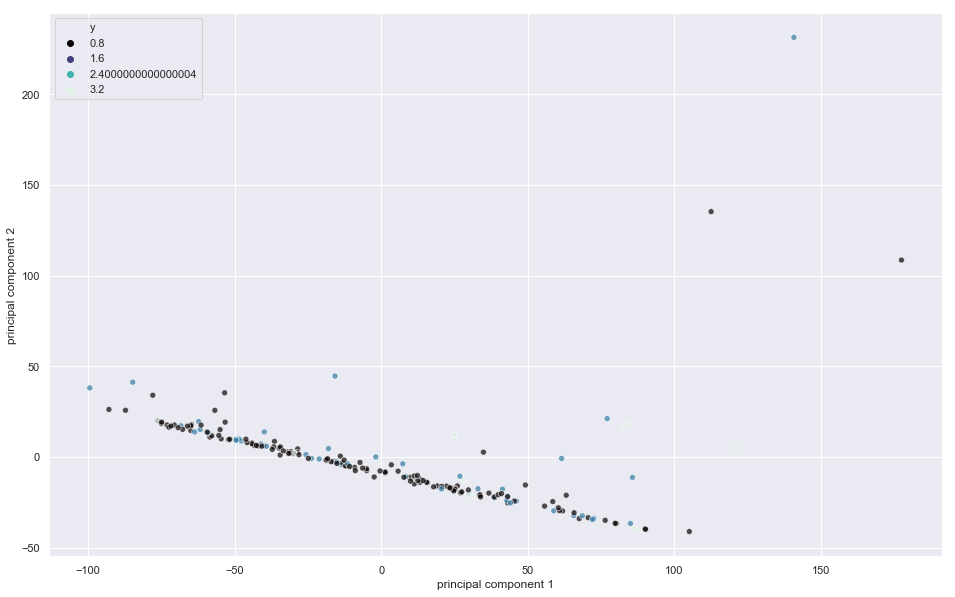

In [22]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",    
    data=principal_cartography_Df,    
    alpha=0.7,
    palette="mako"
)

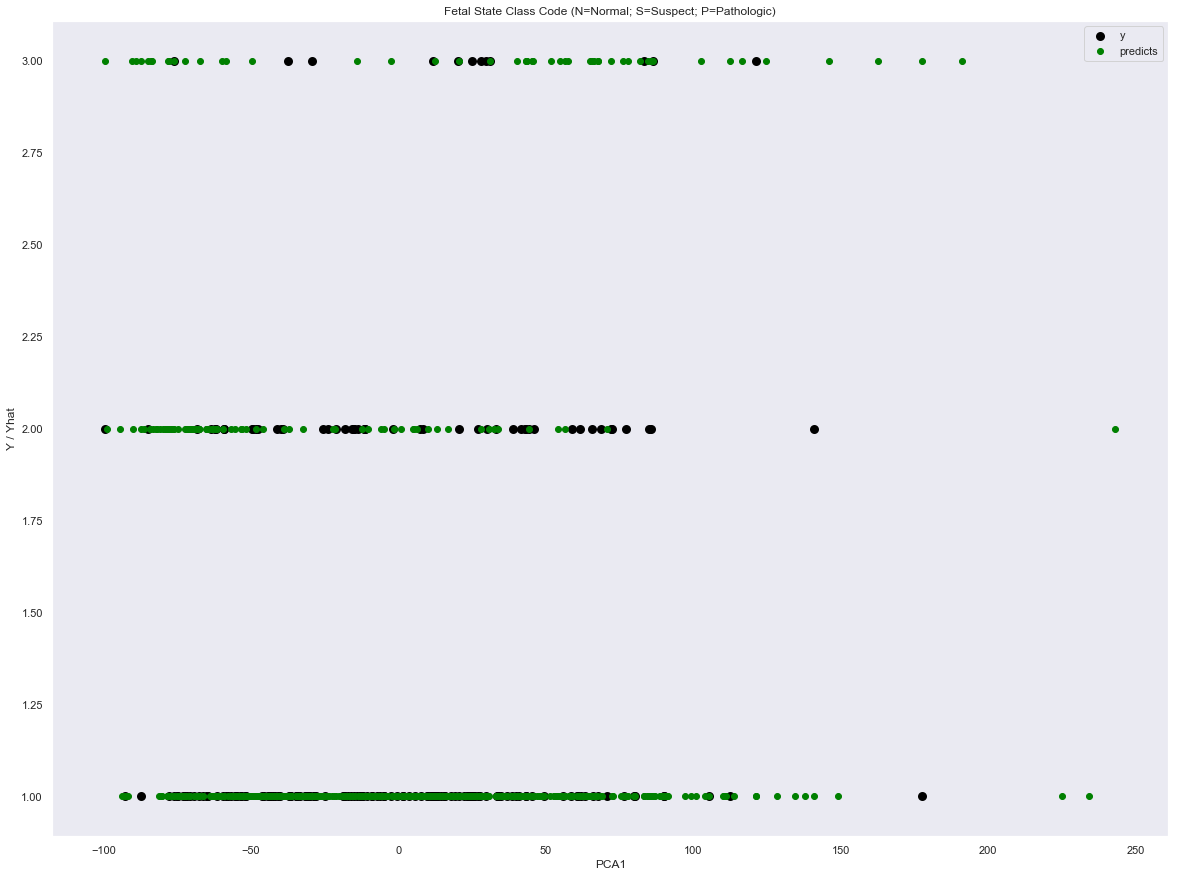

In [23]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 1", 
            y="y",  
            color="black", 
            linewidths=3,
            data=principal_cartography_Df)
plt.scatter(x="principal component 1", 
            y="predicts", 
            color="green", 
            data=principal_cartography_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Fetal State Class Code (N=Normal; S=Suspect; P=Pathologic)")
plt.xlabel('PCA1')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()

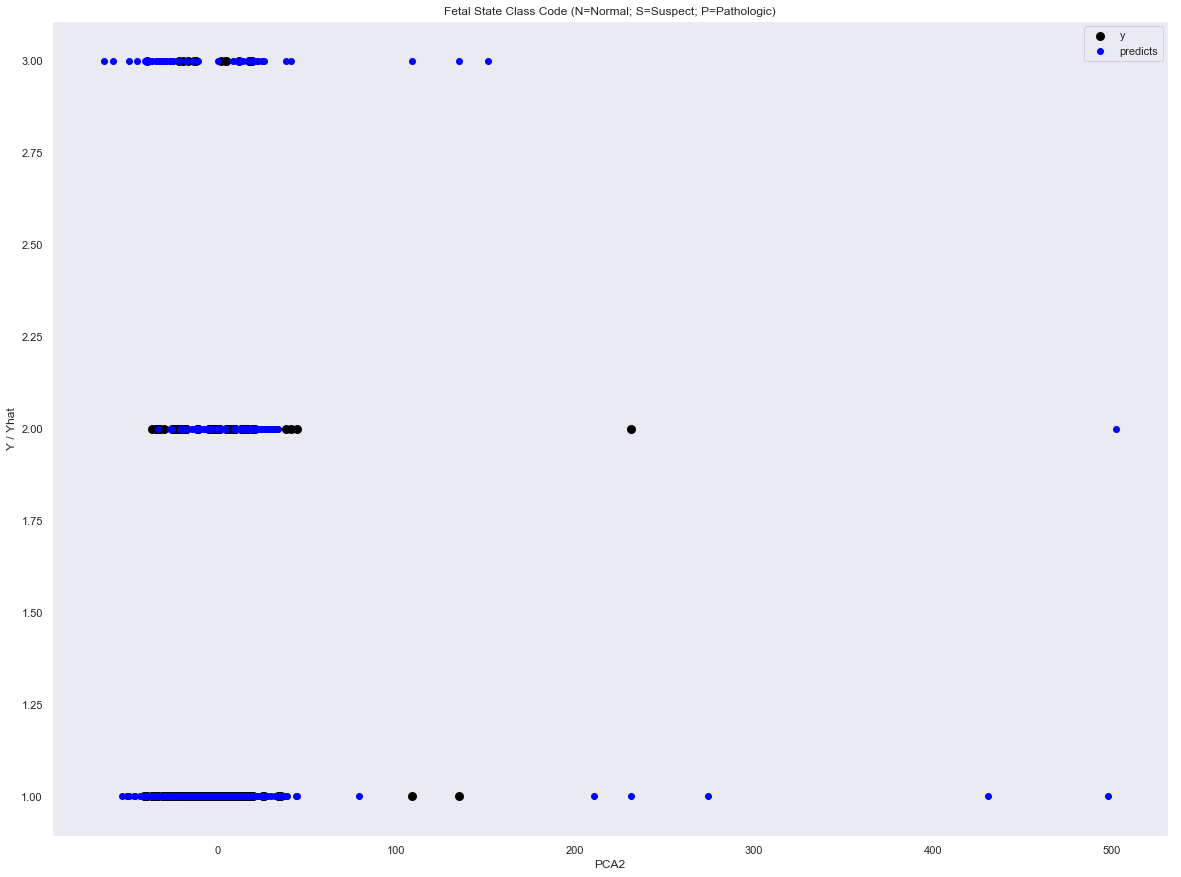

In [24]:
# Plot outputs
plt.figure(figsize=(20,15))
plt.scatter(x="principal component 2", 
            y="y",  
            color='black', 
            linewidths=3, 
            data=principal_cartography_Df)
plt.scatter(x="principal component 2", 
            y="predicts", 
            color='blue', 
            data=principal_cartography_Df)

#plt.xticks(())
#plt.yticks(())

plt.title("Fetal State Class Code (N=Normal; S=Suspect; P=Pathologic)")
plt.xlabel('PCA2')
plt.ylabel('Y / Yhat')

plt.legend()
plt.grid()

plt.show()